In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("S02-hw-dataset.csv")
print(df.head())
print(df.info())
print(df.describe())


   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [3]:
print(df.isna().sum())

print(f'Количество дубликатов {df.duplicated().sum()}; процент дубликатов: {df.duplicated().mean()}')
print("Дубликаты:")
print(df[df.duplicated()])

print("Подозрительные данные:") #проверки чтобы возраст был <= 100 не будет (пожалейте пенсию)
print(df[df["age"] < 18])
print(df[df["purchases"] < 0])
print(df[df["revenue"] < 0])
print(df[(df["purchases"] != 0) & (df["revenue"] == 0)])


user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64
Количество дубликатов 1; процент дубликатов: 0.024390243902439025
Дубликаты:
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511
Подозрительные данные:
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [110]:
print("Нормальные данные:")
prodDf = df.copy() #избавляемся от дубликатов
prodDf.drop_duplicates(inplace=True)
prodDf.dropna(inplace=True)
prodDf.drop(prodDf[prodDf["age"] < 18].index, inplace=True)
prodDf.drop(prodDf[prodDf["purchases"] < 0].index, inplace=True)
prodDf.drop(prodDf[prodDf["revenue"] < 0].index, inplace=True)
prodDf.drop(prodDf[(prodDf["purchases"] != 0) & (prodDf["revenue"] == 0)].index, inplace=True)

prodDf.info()

Нормальные данные:
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 39
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    35 non-null     int64  
 1   age        35 non-null     float64
 2   country    35 non-null     object 
 3   purchases  35 non-null     int64  
 4   revenue    35 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ KB


Анализ качества данных:
Датасет содержит 41 запись, 40 из них уникальны (1 дубликат)
2 пропуска данных в атрибуте age
Атрибут age содержит 1 запись с подозрительным значением (помимо пустых значений)
Атрибут country не содержит подозрительных записей
Атрибут purchas содержит 1 подозрительную запись
Атрибут revenue не содержит подозрительных записей
В результате анализа атрибутов purchas и revenue была выявлена ещё одна подозрительная запись
В результате очистки данных от дубликатов и странных данных получилось 35 записей (0.85 от первоначального количества записей),
что позволяет нам сделать следующий вывод о данных: Данные требуют минимальной предобработки, после очистки пригодны для анализа (норм)

In [76]:
print(df["country"].value_counts())
print(df.groupby("country")["revenue"].mean())
print(df.groupby("country")["purchases"].sum())

dtBins = pd.cut(df["age"], bins=5)
df["ageGroup"] = dtBins

print(df["ageGroup"].value_counts())
print(df.groupby("ageGroup")["revenue"].mean())
print(df.groupby("ageGroup")["purchases"].sum())
print("\n")

print(df.groupby("country")["purchases"].mean())
print(df.groupby("ageGroup")["purchases"].mean())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64
country
CN     9
DE    39
FR    51
RU    62
US    37
Name: purchases, dtype: int64
ageGroup
(28.0, 51.0]     18
(4.885, 28.0]    15
(51.0, 74.0]      5
(97.0, 120.0]     1
(74.0, 97.0]      0
Name: count, dtype: int64
ageGroup
(4.885, 28.0]    662.933333
(28.0, 51.0]     984.944444
(51.0, 74.0]     647.600000
(74.0, 97.0]            NaN
(97.0, 120.0]    785.000000
Name: revenue, dtype: float64
ageGroup
(4.885, 28.0]    70
(28.0, 51.0]     87
(51.0, 74.0]     27
(74.0, 97.0]      0
(97.0, 120.0]    -1
Name: purchases, dtype: int64


country
CN    4.500000
DE    6.500000
FR    4.250000
RU    4.769231
US    4.625000
Name: purchases, dtype: float64
ageGroup
(4.885, 28.0]    4.666667
(28.0, 51.0]     4.833333
(51.0, 74.0]     5.400000
(74.0, 97.0]          NaN
(97.0, 120.0]   -1.000000
N

C:\Users\user\AppData\Local\Temp\ipykernel_16820\409347734.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("ageGroup")["revenue"].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_16820\409347734.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("ageGroup")["purchases"].sum())
C:\Users\user\AppData\Local\Temp\ipykernel_16820\409347734.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

Был создан новый категориатьный признак (принадлежность к одной из 5ти возрастных груп)
Для категориальных переменных (страны и возрастной группы) были посчитаны частоты, в результате чего было установлено, что в выборке доминируют записи о пользователях из России и Франции (около 30%), и практически не встречаются записи о пользоателях из Китая (около 4%), также в выборке доминируют пользователи в возрасте от 4х до 28ми лет и от 28 лет до 51го года (около 40%), и вообще отсутствуют представители возрастной группы от 74х до 97ми лет.
Также для двух категориальных переменных был посчитан средний доход и общее число покупок, в результате чего было установленно, что количество покупок сильно коррелирует с количеством записей из этой группы и не даёт в полной мере оценить картину.
В результате чего было посчитано среднее количество покупок в каждой группе и были установлены следующие закономерности:
1) Пользователи из Германии имеют в среднем доход выше, чем у представителей других стран, и среднее количество покупок у этих пользователей также выче, чем у остальных.
2) Пользователи возрастной группы (51 - 74) хотя в среднем и не имеют самый высокий доход, однако в среднем имеют самое большое число покупок. Это может быть связано с малым количеством экземпляров этой возрастной группы
3) Возрастная группа (97 - 120) представлена лишь одним экземпляром с аномальными значениями (-1 покупка (норм всё с головой у деда 120 годиков?)), поэтому она не является интересной для анализа

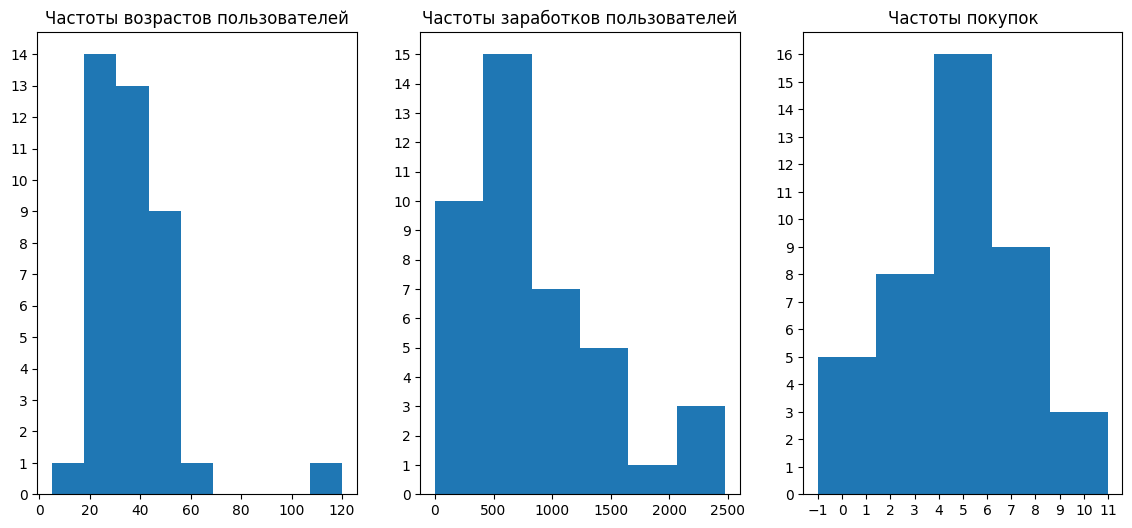

In [85]:
def binsCount(ser):
    IQR = ser.quantile(0.75) - ser.quantile(0.25)
    n = len(ser)
    return int((ser.max() - ser.min()) / (2 * IQR * n**(-1/3))) 


fig, (axAge, axRevenue, axPurchases) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 6))

axAge.hist(df["age"], bins=binsCount(df["age"]))
axAge.set_title("Частоты возрастов пользователей")
axAge.locator_params(axis='x', nbins=12)
axAge.locator_params(axis='y', nbins=15)

axRevenue.hist(df["revenue"], bins=binsCount(df["revenue"]))
axRevenue.set_title("Частоты заработков пользователей")
axRevenue.locator_params(axis='x', nbins=10)
axRevenue.locator_params(axis='y', nbins=16)

axPurchases.hist(df["purchases"], bins=binsCount(df["purchases"]))
axPurchases.set_title("Частоты покупок")
axPurchases.locator_params(axis='x', nbins=14)
axPurchases.locator_params(axis='y', nbins=17)

plt.savefig("hist")
plt.show()

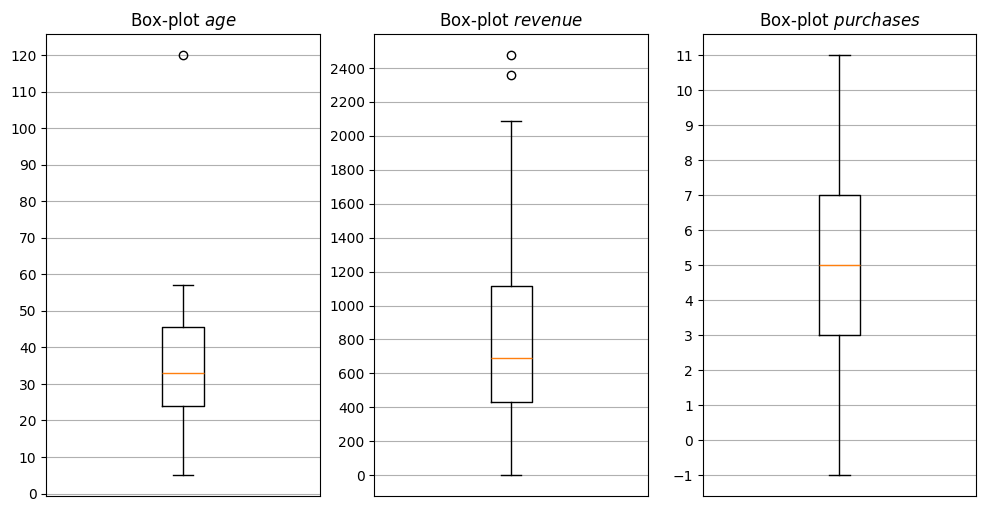

In [54]:
fig, (axAge, axRevenue, axPurchases) = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 6))

axAge.boxplot(df["age"][df["age"].notna()])
axAge.set_title("Box-plot $age$")
axAge.grid()
axAge.xaxis.set_visible(False)
axAge.locator_params(axis="y", nbins=14)

axRevenue.boxplot(df["revenue"])
axRevenue.set_title("Box-plot $revenue$")
axRevenue.grid()
axRevenue.xaxis.set_visible(False)
axRevenue.locator_params(axis="y", nbins=14)

axPurchases.boxplot(df["purchases"])
axPurchases.set_title("Box-plot $purchases$")
axPurchases.grid()
axPurchases.xaxis.set_visible(False)
axPurchases.locator_params(axis="y", nbins=14)

plt.show()

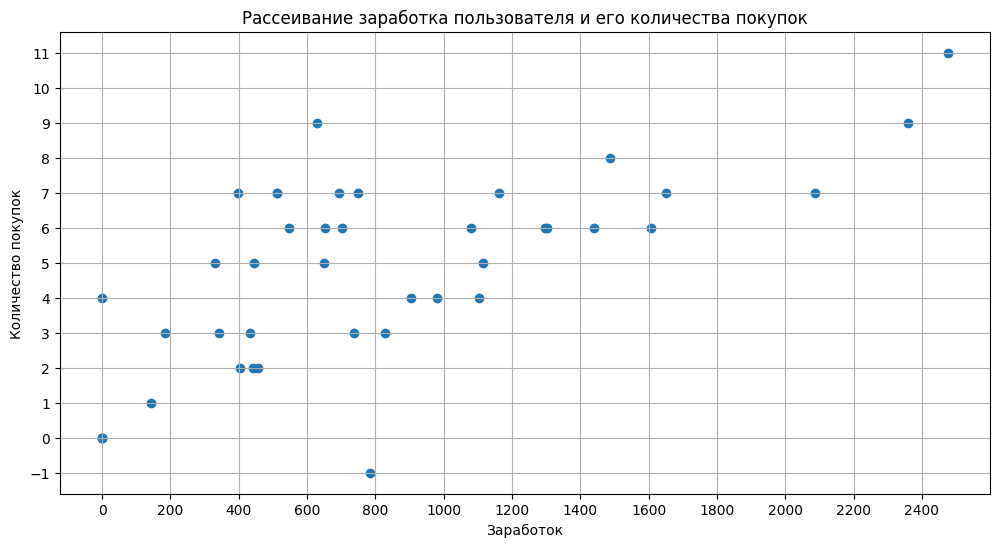

In [84]:
fig, axRevPur = plt.subplots(figsize=(12, 6))

axRevPur.scatter(y=df["purchases"], x=df["revenue"])
axRevPur.set_xlabel("Заработок")
axRevPur.set_ylabel("Количество покупок")
axRevPur.set_title("Рассеивание заработка пользователя и его количества покупок")

axRevPur.locator_params(axis="y", nbins=14)
axRevPur.locator_params(axis="x", nbins=14)
axRevPur.grid()

plt.show()